In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [3]:
output_path = "/home/isha/Desktop/AU/Work_Done/Wave_Dark_Matter/Unscaled_PS/CDM/"

## Context
See equation 5.50 from Cosmology by Baumann. 
\begin{equation}
\ddot{\delta_k} + 2 H \dot {\delta_k} - 4 \pi G \bar{\rho_m}(t) \delta_{k} = 0
\end{equation}

Objectives:
- Study the time evolution of $\delta_{k}$ and $\dot{\delta_{k}}$ numerically initially for 1 value of k and then for a range of k values. 
- Obtain power spectra. 


## Set the values of unscaled constants and define the range of k values

In [ ]:
k_pow = np.arange(-6, 4)   
k_val = 10.0 ** k_pow

length_scale = 2 * np.pi / k_val    
#k_val, length_scale

(array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
        1.e+02, 1.e+03]),
 array([6.28318531e+06, 6.28318531e+05, 6.28318531e+04, 6.28318531e+03,
        6.28318531e+02, 6.28318531e+01, 6.28318531e+00, 6.28318531e-01,
        6.28318531e-02, 6.28318531e-03]))

In [5]:
G = 1
hbar = 1
m = 1

## Some time dependent functions

In [7]:
def scale_factor_a(t):
    return (t**(2/3))

def Hubble_val(t):
    return (2/(3*t))

def rho_matter(t):
    return (1/(6 * np.pi * G * t**2))

The above 2nd order ODE can be converted into 1st order as

\begin{equation}
y_{1} = \delta_{k}
\end{equation}

\begin{equation}
y_{2} = \dot y_{1} = \dot {\delta_{k}}
\end{equation}

## For 1 value of k

In [30]:
t_i =  1e-2
t_f = 1e6
t_span = [t_i, t_f]
t_eval = np.logspace(np.log10(t_i), np.log10(t_f), 500)

delta = 1e-5       #Arbitrary choice
delta_dot = 0      #Dont use the analytic expression: 2**delta_k / (3*t_i) 
#Assume initial growth rate is zero

initial_conditions = [delta, delta_dot]
initial_conditions

[1e-05, 0]

In [31]:
k_sel = k_val[-4]   #Select k = 10^-1
k_sel

1.0

In [32]:
def ode_cdm(t, y):
    u1, u2 = y      #u1 = delta | u2 = delta_dot
    
    #H = 2 / (3 * t)
    quantum_term = 0
    grav_term = 4 * np.pi * G * rho_matter(t)   

    #Solve the following coupled 1st order ODEs
    du1_dt = u2
    du2_dt = -2*Hubble_val(t)*u2 + (grav_term - quantum_term)*u1
    return [du1_dt, du2_dt]

In [33]:
sol_cdm = solve_ivp(
        ode_cdm,
        t_span,
        initial_conditions,
        t_eval=t_eval,
    )

cdm_df = pd.DataFrame({
    't': sol_cdm.t,
    'delta_cdm': sol_cdm.y[0],
    'delta_dot_cdm': sol_cdm.y[1]
})
cdm_df.to_csv(output_path + "CDM_k=1_Perturbations_Growth.csv", index=False)

In [34]:
cdm_df

,t,delta_cdm,delta_dot_cdm
0,0.010000,0.000010,0.000000e+00
1,0.010376,0.000010,2.357711e-05
2,0.010766,0.000010,4.518738e-05
3,0.011171,0.000010,6.497338e-05
4,0.011591,0.000010,8.307164e-05
...,...,...,...
495,862723.729246,1.171128,9.050010e-07
496,895166.472138,1.200300,8.939458e-07
497,928829.225017,1.230201,8.830160e-07
498,963757.866384,1.260851,8.722136e-07


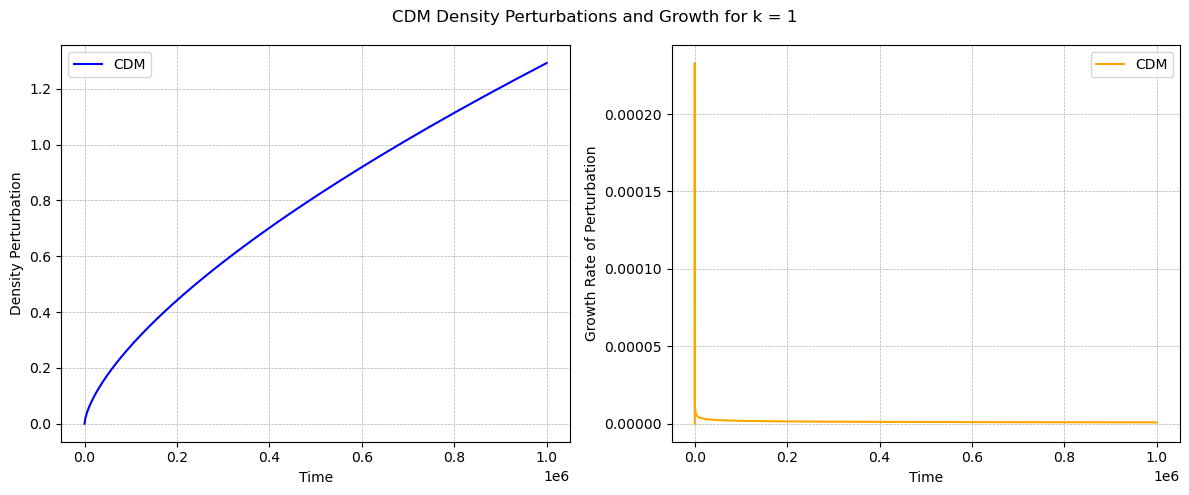

In [40]:
fig,ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(cdm_df['t'], cdm_df['delta_cdm'], label='CDM', color='blue')
ax[1].plot(cdm_df['t'], cdm_df['delta_dot_cdm'], label='CDM', color='orange')   

for i in ax:
    i.set_xlabel('Time')
    i.legend()
    i.grid(True, which="both", ls="--", lw=0.5)

ax[0].set_ylabel('Density Perturbation')
ax[1].set_ylabel('Growth Rate of Perturbation')
plt.suptitle('CDM Density Perturbations and Growth for k = 1')
plt.tight_layout()
plt.savefig(output_path + "CDM_k=1_Perturbations_Growth.png")
plt.show()

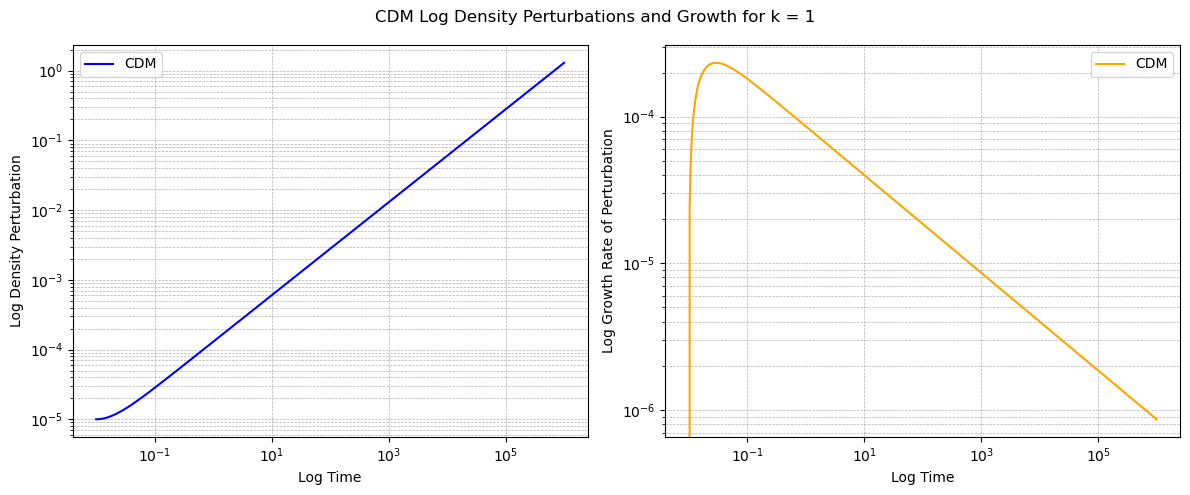

In [44]:
fig,ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(cdm_df['t'], cdm_df['delta_cdm'], label='CDM', color='blue')
ax[1].plot(cdm_df['t'], cdm_df['delta_dot_cdm'], label='CDM', color='orange')   

for i in ax:
    i.set_xlabel('Log Time')
    i.set_xscale('log')     
    i.set_yscale('log')
    i.legend()
    i.grid(True, which="both", ls="--", lw=0.5)

ax[0].set_ylabel('Log Density Perturbation')
ax[1].set_ylabel('Log Growth Rate of Perturbation')
plt.suptitle('CDM Log Density Perturbations and Growth for k = 1')
plt.tight_layout()
plt.savefig(output_path + "CDM_k=1_Log_Perturbations_Growth.png")
plt.show()

## For multiple k values

In [46]:
def ode_cdm_allkvals(t, y, k):
    u1, u2 = y      #u1 = delta | u2 = delta_dot
    
    #H = 2 / (3 * t)
    quantum_term = 0
    grav_term = 4 * np.pi * G * rho_matter(t)

    #Solve the following coupled 1st order ODEs
    du1_dt = u2
    du2_dt = -2*Hubble_val(t)*u2 + (grav_term - quantum_term)*u1
    return [du1_dt, du2_dt]

In [47]:
cdm_allkvals = []
for k_i in k_val:
    sol_cdm = solve_ivp(
        ode_cdm_allkvals,
        t_span,
        initial_conditions,
        t_eval=t_eval,
        args=(k_i,),
        #method = 'LSODA'
    )

    for j in range(len(t_eval)):
        cdm_allkvals.append(
            {
                't': t_eval[j],
                'k': k_i,
                'delta_cdm': sol_cdm.y[0][j],
                'delta_dot_cdm': sol_cdm.y[1][j]
            }
        )


In [48]:
cdm_df_allkvals = pd.DataFrame(cdm_allkvals)
cdm_df_allkvals.to_csv(output_path + 'CDM_AllkVals_Perturbations_Growth.csv', index=False)

In [49]:
cdm_df_allkvals

,t,k,delta_cdm,delta_dot_cdm
0,0.010000,0.000001,0.000010,0.000000e+00
1,0.010376,0.000001,0.000010,2.357711e-05
2,0.010766,0.000001,0.000010,4.518738e-05
3,0.011171,0.000001,0.000010,6.497338e-05
4,0.011591,0.000001,0.000010,8.307164e-05
...,...,...,...,...
4995,862723.729246,1000.000000,1.171128,9.050010e-07
4996,895166.472138,1000.000000,1.200300,8.939458e-07
4997,928829.225017,1000.000000,1.230201,8.830160e-07
4998,963757.866384,1000.000000,1.260851,8.722136e-07


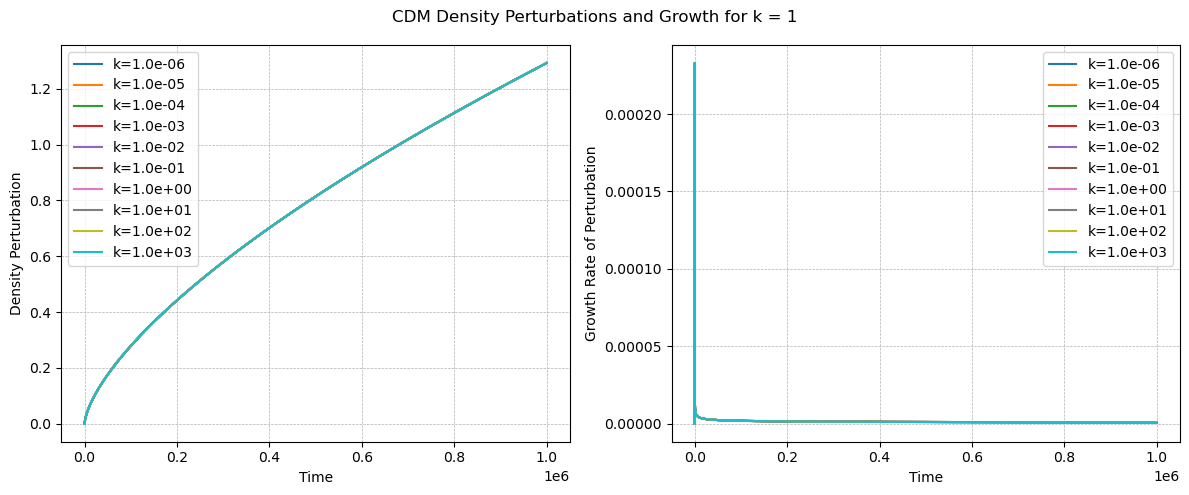

In [59]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))

for k_i in sorted(cdm_df_allkvals['k'].unique()):
    df_k = cdm_df_allkvals[cdm_df_allkvals['k'] == k_i]
    ax[0].plot(df_k['t'], df_k['delta_cdm'], label=f'k={k_i:.1e}')
    ax[1].plot(df_k['t'], df_k['delta_dot_cdm'], label=f'k={k_i:.1e}')      

    for i in ax:
        i.set_xlabel('Time')
        i.legend()
        i.grid(True, which="both", ls="--", lw=0.5) 

ax[0].set_ylabel('Density Perturbation')
ax[1].set_ylabel('Growth Rate of Perturbation')
plt.suptitle('CDM Density Perturbations and Growth for k = 1')
plt.tight_layout()
plt.savefig(output_path + "CDM_AllkVaks_Perturbations_Growth.png")
plt.show()

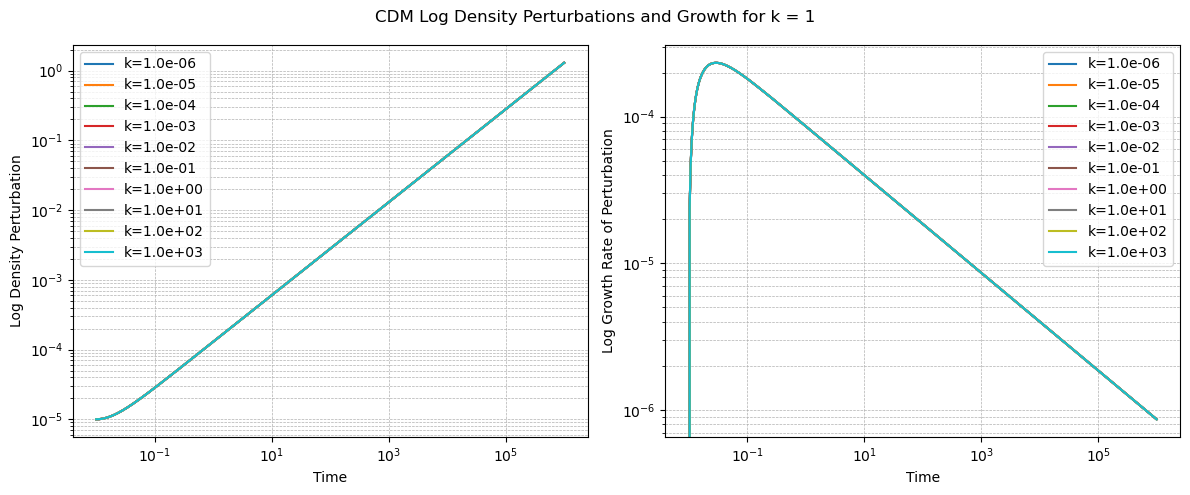

In [58]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))

for k_i in sorted(cdm_df_allkvals['k'].unique()):
    df_k = cdm_df_allkvals[cdm_df_allkvals['k'] == k_i]
    ax[0].loglog(df_k['t'], df_k['delta_cdm'], label=f'k={k_i:.1e}')
    ax[1].loglog(df_k['t'], df_k['delta_dot_cdm'], label=f'k={k_i:.1e}')      

    for i in ax:
        i.set_xlabel('Time')
        i.legend()
        i.grid(True, which="both", ls="--", lw=0.5) 

ax[0].set_ylabel('Log Density Perturbation')
ax[1].set_ylabel('Log Growth Rate of Perturbation')
plt.suptitle('CDM Log Density Perturbations and Growth for k = 1')
plt.tight_layout()
plt.savefig(output_path + "CDM_AllkVals_Log_Perturbations_Growth.png")
plt.show()


## Power spectrum 

In [61]:
As = 2e-9 #From arXiv:2407.04198v2 which referneces Planck 2018 results
ns = 0.96
P_prim = As * k_val ** (ns-4)     #From Baumann Cosmology textbook equation 5.82 for k>k_eq
P_prim

array([3.47560166e+09, 3.16978638e+06, 2.89087954e+03, 2.63651348e+00,
       2.40452887e-03, 2.19295639e-06, 2.00000000e-09, 1.82402168e-12,
       1.66352754e-15, 1.51715515e-18])

In [62]:
cdm_allkvals1 = []

for k_i in k_val:

    #Scalar primordial PS for this k
    P_prim_i = As * k_i ** (ns - 4)

    delta_ini = np.sqrt(P_prim_i)
    delta_dot_ini = 0.0

    ic = [delta_ini, delta_dot_ini]  #Should be 1D vector of length 2

    sol_cdm = solve_ivp(
        ode_cdm_allkvals,
        t_span,
        ic,
        t_eval=t_eval,
        args=(k_i,),
        # method='LSODA'
    )

    for j in range(len(t_eval)):
        cdm_allkvals1.append({
            't': t_eval[j],
            'k': k_i,
            'delta_cdm': sol_cdm.y[0, j],
            'delta_dot_cdm': sol_cdm.y[1, j],
            'scale_factor_a': scale_factor_a(t_eval[j])
        })

In [63]:
df = pd.DataFrame(cdm_allkvals1)
df

,t,k,delta_cdm,delta_dot_cdm,scale_factor_a
0,0.010000,0.000001,58954.233584,0.000000e+00,0.046416
1,0.010376,0.000001,58980.898235,1.389972e+05,0.047572
2,0.010766,0.000001,59060.415501,2.664467e+05,0.048758
3,0.011171,0.000001,59192.364051,3.831120e+05,0.049972
4,0.011591,0.000001,59376.258585,4.897598e+05,0.051218
...,...,...,...,...,...
4995,862723.729246,1000.000000,0.000141,1.092556e-10,9062.496023
4996,895166.472138,1000.000000,0.000145,1.079246e-10,9288.292250
4997,928829.225017,1000.000000,0.000148,1.066069e-10,9519.714293
4998,963757.866384,1000.000000,0.000152,1.053029e-10,9756.902323


In [64]:
df["P_k"] = df["delta_cdm"]**2
df["Delta2_k"] = (df["k"]**3 / (2 * np.pi**2)) * df["P_k"]

In [65]:
t_plot = df["t"].max()   #final time
df_t = df[df["t"] == t_plot]
df_t

,t,k,delta_cdm,delta_dot_cdm,scale_factor_a,P_k,Delta2_k
499,1000000.0,0.000001,7.619702e+09,5.079959e+03,10000.0,5.805985e+19,2.941347
999,1000000.0,0.000010,2.301073e+08,1.534085e+02,10000.0,5.294938e+16,2.682447
1499,1000000.0,0.000100,6.949246e+06,4.632982e+00,10000.0,4.829201e+13,2.446502
1999,1000000.0,0.001000,2.098542e+05,1.399065e-01,10000.0,4.403877e+10,2.231030
2499,1000000.0,0.010000,6.337797e+03,4.225321e-03,10000.0,4.016767e+07,2.034918
2999,1000000.0,0.100000,1.913927e+02,1.276003e-04,10000.0,3.663118e+04,1.855757
3499,1000000.0,1.000000,5.779856e+00,3.853376e-06,10000.0,3.340673e+01,1.692405
3999,1000000.0,10.000000,1.745169e-01,1.163494e-07,10000.0,3.045616e-02,1.542927
4499,1000000.0,100.000000,5.255849e-03,3.504036e-09,10000.0,2.762395e-05,1.399445
4999,1000000.0,1000.000000,1.559868e-04,1.040141e-10,10000.0,2.433187e-08,1.232667


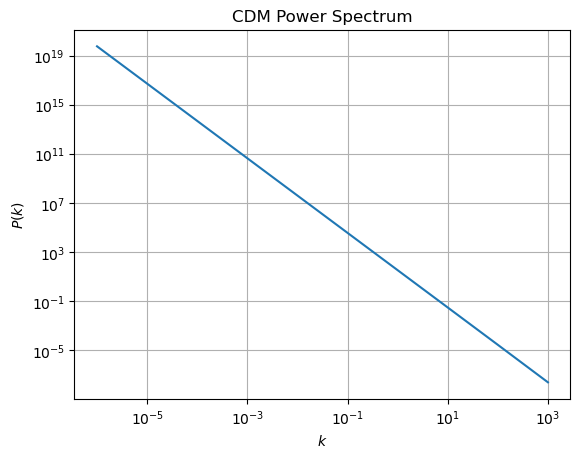

In [68]:
plt.loglog(df_t["k"], df_t["P_k"])
plt.xlabel(r"$k$")
plt.ylabel(r"$P(k)$")
plt.title("CDM Power Spectrum")
plt.grid(True)

plt.savefig(output_path + 'CDM_power_spectrum.png', dpi=300)
plt.show()

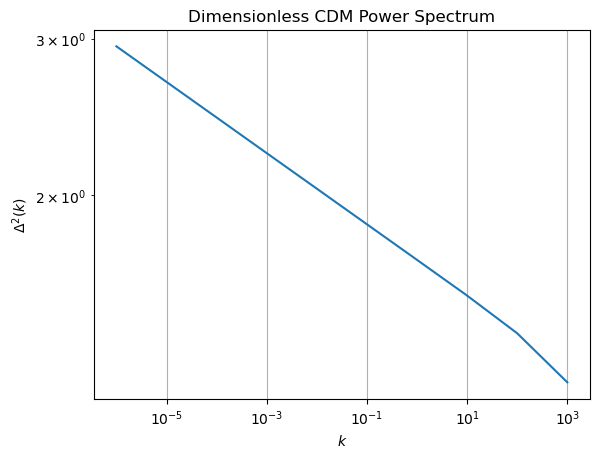

In [69]:
plt.loglog(df_t["k"], df_t["Delta2_k"])
plt.xlabel(r"$k$")
plt.ylabel(r"$\Delta^2(k)$")
plt.title("Dimensionless CDM Power Spectrum")
plt.grid(True)
plt.show()